In [30]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

In [31]:
# Loading and reading the file (Flight Take Off dataset)
flights = pd.read_csv('M1_final.csv')
flights.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [32]:
# Information about our dataset
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [33]:
# Generating descriptive statistics
flights.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
count,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000
mean,7.894240,16.021096,4.008952,6.374983,225.288203,1267.746079,831.003851,828.934698,910.874289,41.489833,57.732616,12.367627,5.535323,30.092433,31.091256,28.432130,20.858570
std,4.991723,8.750179,1.985230,38.735144,119.482417,889.343246,299.398525,305.864103,345.411743,8.043533,23.468676,6.259298,11.886457,0.296160,9.510359,8.263043,6.851915
min,1.000000,1.000000,1.000000,-22.000000,57.000000,94.000000,301.000000,1.000000,1.000000,17.000000,0.000000,0.000000,0.000000,29.200000,0.000000,0.000000,5.000000
25%,1.000000,8.000000,2.000000,-6.000000,124.000000,483.000000,545.000000,542.000000,667.000000,36.000000,46.000000,8.000000,0.000000,29.880000,26.000000,21.000000,16.000000
50%,11.000000,16.000000,4.000000,-3.000000,188.000000,1029.000000,856.000000,854.000000,918.000000,42.000000,59.000000,12.000000,0.000000,30.110000,30.000000,30.000000,19.000000
75%,12.000000,24.000000,6.000000,2.000000,365.000000,2248.000000,1095.000000,1097.000000,1193.000000,47.000000,74.000000,16.000000,0.000000,30.320000,37.000000,35.000000,25.000000
max,12.000000,31.000000,7.000000,1276.000000,697.000000,4983.000000,1439.000000,1440.000000,1439.000000,68.000000,97.000000,36.000000,49.000000,30.750000,55.000000,46.000000,41.000000


In [34]:
# Creating a correlation matrix
corr_matrix = flights.corr()
corr_matrix

C:\Users\mcd_m\AppData\Local\Temp\ipykernel_4392\2523036694.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = flights.corr()


,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
MONTH,1.000000,-0.007254,0.029365,0.046455,-0.016052,-0.000144,0.001824,0.002632,-0.012361,0.135682,0.012515,-0.035097,-0.051014,-0.085274,-0.006191,-0.019705,0.018505
DAY_OF_MONTH,-0.007254,1.000000,-0.029732,-0.036618,0.002761,-0.002762,0.001754,0.004446,0.008519,-0.132457,0.096215,-0.093211,-0.088991,0.016871,-0.003417,0.002223,-0.023990
DAY_OF_WEEK,0.029365,-0.029732,1.000000,-0.006203,0.000413,0.002450,0.005411,0.008256,-0.003339,0.013081,0.001627,0.095943,0.127689,0.102289,0.024415,0.009621,0.028388
DEP_DELAY,0.046455,-0.036618,-0.006203,1.000000,-0.030871,-0.031507,0.102384,0.072340,0.043691,-0.032261,-0.011776,0.067718,0.044340,-0.064939,-0.065452,-0.006949,0.034881
CRS_ELAPSED_TIME,-0.016052,0.002761,0.000413,-0.030871,1.000000,0.994465,-0.031332,-0.021391,0.035186,-0.016050,0.017198,-0.013440,-0.011934,0.010165,0.083426,-0.067669,0.070838
DISTANCE,-0.000144,-0.002762,0.002450,-0.031507,0.994465,1.000000,-0.040963,-0.034604,0.008520,-0.009923,0.015110,-0.010734,-0.009522,0.005692,0.059174,-0.088793,0.059856
CRS_DEP_M,0.001824,0.001754,0.005411,0.102384,-0.031332,-0.040963,1.000000,0.946023,0.452476,0.086371,0.003843,0.008063,-0.009887,-0.008285,-0.025621,0.495286,0.044864
DEP_TIME_M,0.002632,0.004446,0.008256,0.072340,-0.021391,-0.034604,0.946023,1.000000,0.469758,0.098105,-0.005923,0.006033,-0.014336,-0.009410,0.025609,0.544197,0.057896
CRS_ARR_M,-0.012361,0.008519,-0.003339,0.043691,0.035186,0.008520,0.452476,0.469758,1.000000,0.101620,-0.033163,0.014180,0.004486,-0.012682,0.149903,0.424209,0.071377
Temperature,0.135682,-0.132457,0.013081,-0.032261,-0.016050,-0.009923,0.086371,0.098105,0.101620,1.000000,0.054401,0.010603,-0.039487,-0.376730,-0.022534,0.075958,-0.067574


<AxesSubplot: >

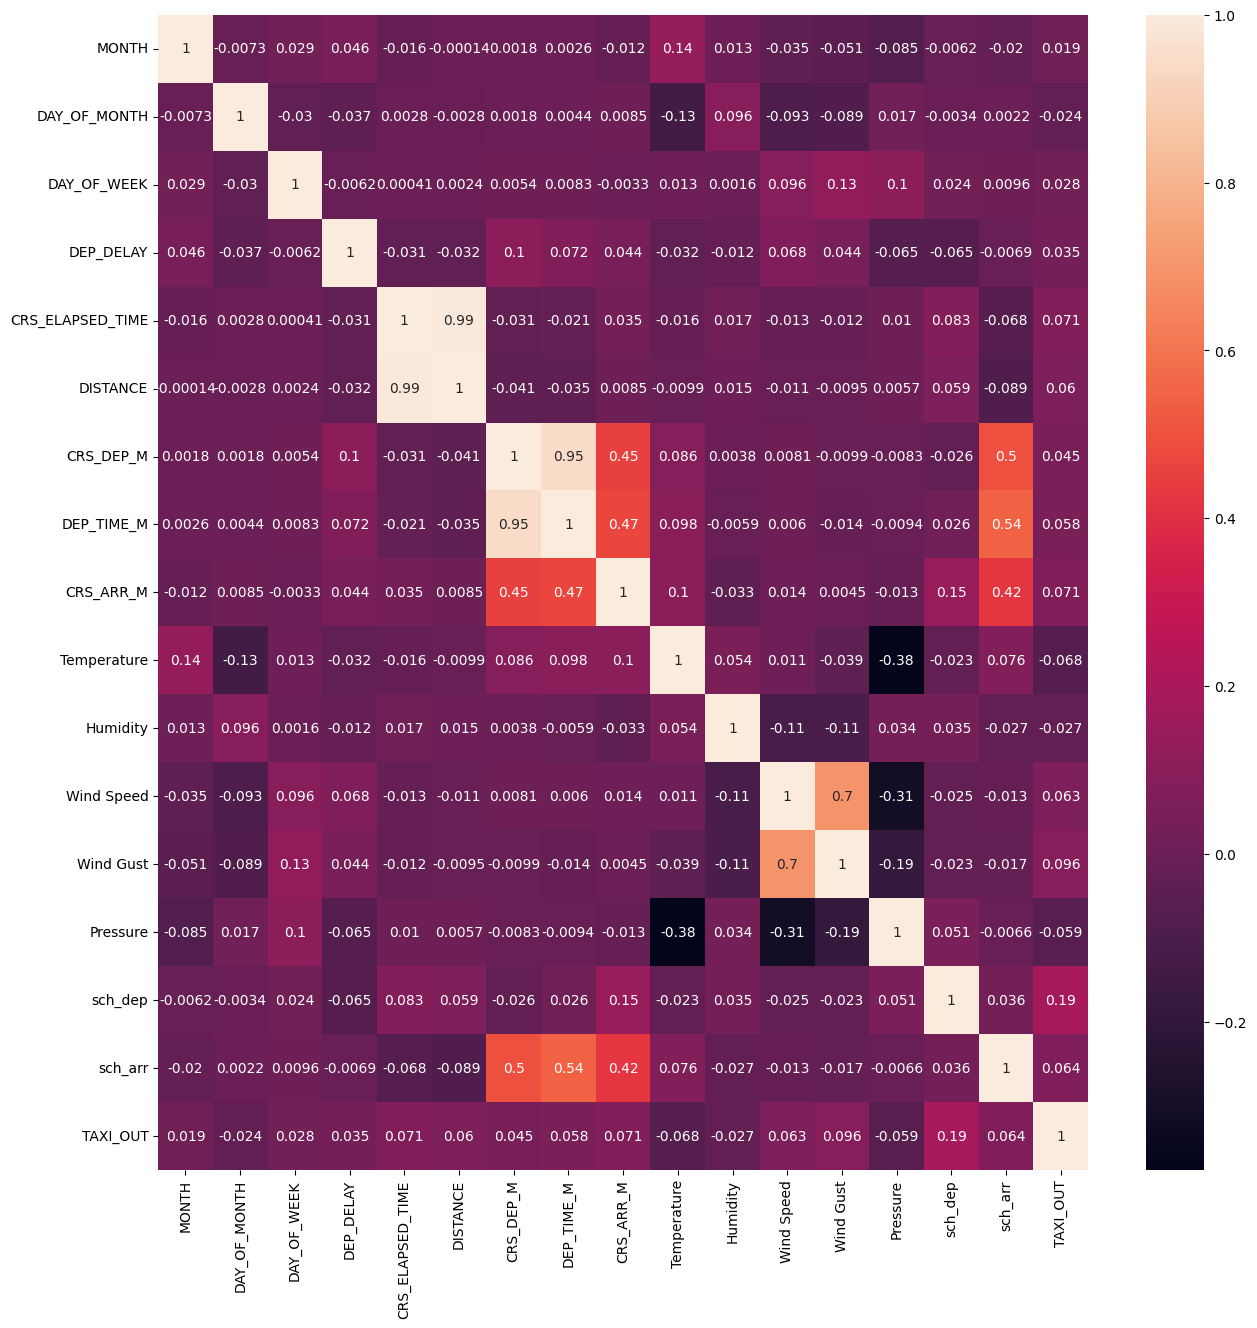

In [35]:
# Creating a heatmap using the previous correlation matrix
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True)

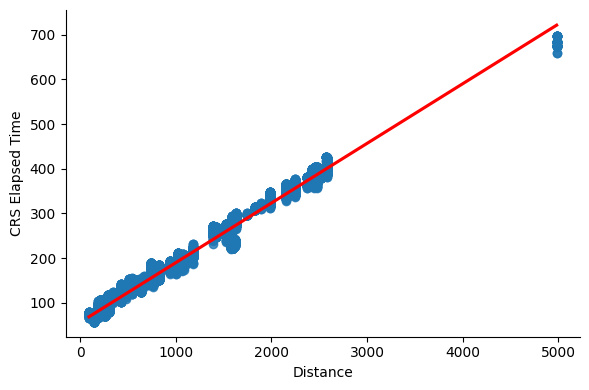

In [36]:
# Exploratory Data Analysis
# Creating a scatterplot of the relationship between the features with highest correlation
# plt.scatter(flights['DISTANCE'], flights['CRS_ELAPSED_TIME'])
sns.lmplot(x="DISTANCE", y="CRS_ELAPSED_TIME", data=flights, line_kws={"color": "red"}, height=4, aspect=1.5)
# Labelling the axes
plt.xlabel("Distance")
plt.ylabel("CRS Elapsed Time")

plt.show()

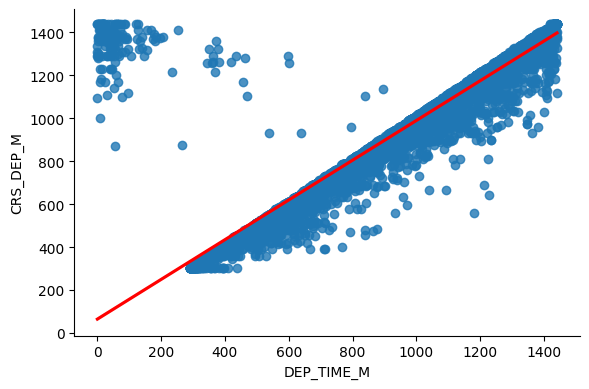

In [37]:
sns.lmplot(x="DEP_TIME_M", y="CRS_DEP_M", data=flights, line_kws={"color": "red"}, height=4, aspect=1.5)
#labelling the axes
plt.xlabel("DEP_TIME_M")
plt.ylabel("CRS_DEP_M")

plt.show()

In [38]:
# Specifying the x and y variables
X = flights.iloc[:,[0,1,2,6,7,8,9,10,11,12,14,16,17,18,20,21]] ##ignoring the columns with categorical values
y = flights.iloc[:, 22]

In [39]:
# Train, test and split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=32)

In [40]:
# Standard scaler - to standarise the model so it is easier to get trained
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
X_train

array([[ 0.61794706,  1.60088848,  1.00123933, ..., -0.24764128,
        -1.16622547, -1.26676775],
       [-1.38850114, -1.71422822, -0.50787574, ..., -0.92727443,
        -0.53780783,  0.30727363],
       [ 0.61794706,  0.45774479, -0.50787574, ..., -0.5534762 ,
        -0.22359901, -1.14568764],
       ...,
       [ 0.61794706,  1.60088848,  1.00123933, ..., -0.04375134,
        -1.27096174, -0.78244732],
       [ 0.81859188, -1.71422822,  1.50427769, ..., -0.28162294,
        -2.10885192, -0.54028711],
       [ 0.81859188, -1.25697075, -0.00483739, ..., -0.11171466,
        -0.43307156,  0.54943384]])

In [42]:
## Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression()

In [43]:
pred_lin = lin_reg.predict(X_test)

In [44]:
# Creating a dataframe for predictions of the Linear Regression model
pd.DataFrame({'Actual': Y_test, 'Predicted': pred_lin})

,Actual,Predicted
9362,23,22.360369
23840,14,21.602074
24617,22,23.475297
24899,19,24.593026
2007,20,18.747511
...,...,...
25794,24,21.119407
9596,21,20.665204
23574,26,19.423742
3772,19,23.845974


In [45]:
## Evaluation metrics
# MAE -- mean absolute error
# MSE -- mean squared error
# RMSE -- root-mean-square deviation
# R2 -- R-squared

print('MAE', metrics.mean_absolute_error(Y_test, pred_lin))
print('MSE', metrics.mean_squared_error(Y_test, pred_lin))
print('RMSE', np.sqrt(metrics.mean_squared_error(Y_test, pred_lin)))
print('R2', metrics.r2_score(Y_test, pred_lin))

MAE 5.287214780938949
MSE 44.25262744759139
RMSE 6.652264835948084
R2 0.069424822783277


In [46]:
# Lasso  
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train, Y_train)

Lasso(alpha=0.1)

In [47]:
# Creating a dataframe for predictions of the Lasso model
pred_lasso = model_lasso.predict(X_test)
pd.DataFrame({'Actual': Y_test, 'Predicted': pred_lasso})

,Actual,Predicted
9362,23,22.004857
23840,14,22.774390
24617,22,22.812932
24899,19,24.394022
2007,20,19.218292
...,...,...
25794,24,21.031442
9596,21,20.315314
23574,26,19.924248
3772,19,23.494686


In [48]:
## Evaluation metrics
# MAE -- mean absolute error
# MSE -- mean squared error
# RMSE -- root-mean-square deviation
# R2 -- R-squared

print('MAE', metrics.mean_absolute_error(Y_test, pred_lasso))
print('MSE', metrics.mean_squared_error(Y_test, pred_lasso))
print('RMSE', np.sqrt(metrics.mean_squared_error(Y_test, pred_lasso)))
print('R2', metrics.r2_score(Y_test, pred_lasso))

MAE 5.3150351398308215
MSE 44.55820056539751
RMSE 6.67519292345903
R2 0.06299901770329908


In [49]:
# Ridge
model_ridge = Ridge(alpha=0.99, random_state=32)
model_ridge.fit(X_train, Y_train)

Ridge(alpha=0.99, random_state=32)

In [51]:
# Creating a dataframe for predictions of the Ridge model
pred_ridge = model_ridge.predict(X_test)
pd.DataFrame({'Actual': Y_test, 'Predicted': pred_ridge})

,Actual,Predicted
9362,23,22.358230
23840,14,21.611813
24617,22,23.470753
24899,19,24.592045
2007,20,18.748371
...,...,...
25794,24,21.121243
9596,21,20.661836
23574,26,19.425495
3772,19,23.848241


In [52]:
## Evaluation metrics
# MAE -- mean absolute error
# MSE -- mean squared error
# RMSE -- root-mean-square deviation
# R2 -- R-squared

print('MAE', metrics.mean_absolute_error(Y_test, pred_ridge))
print('MSE', metrics.mean_squared_error(Y_test, pred_ridge))
print('RMSE', np.sqrt(metrics.mean_squared_error(Y_test, pred_ridge)))
print('R2', metrics.r2_score(Y_test, pred_ridge))

MAE 5.287257577681373
MSE 44.25298654460059
RMSE 6.652291826476089
R2 0.069417271440402


In [53]:
# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=200, random_state=32)
rf_reg.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=200, random_state=32)

In [54]:
# Creating a dataframe for predictions of the Random Forest model
rf_reg_pred = rf_reg.predict(X_test)
pd.DataFrame({'Actual': Y_test, 'Predicted': rf_reg_pred})

,Actual,Predicted
9362,23,23.925
23840,14,18.445
24617,22,21.815
24899,19,17.965
2007,20,21.690
...,...,...
25794,24,23.210
9596,21,18.550
23574,26,21.920
3772,19,21.175


In [56]:
## Evaluation metrics
# MAE -- mean absolute error
# MSE -- mean squared error
# RMSE -- root-mean-square deviation
# R2 -- R-squared

print('MAE', metrics.mean_absolute_error(Y_test, rf_reg_pred))
print('MSE', metrics.mean_squared_error(Y_test, rf_reg_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(Y_test, rf_reg_pred)))
print('R2', metrics.r2_score(Y_test, rf_reg_pred))

MAE 4.435899259773305
MSE 32.790605612421935
RMSE 5.7263082009635085
R2 0.31045622850391774
